# Redes Neuronales

In [1]:
import numpy as np

from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from mlutils import load_dataset
import matplotlib.pyplot as plt

%matplotlib inline

## Repaso de algunas funciones de activación

### ReLU

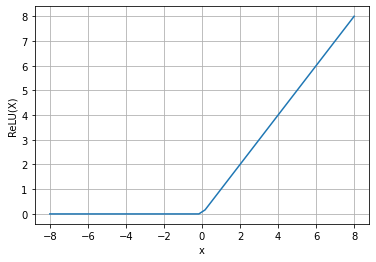

In [2]:
eje_x = np.linspace(-8,8)

def ReLU(x):
    return np.array([xi if xi >= 0 else 0 for xi in x])

plt.plot(eje_x, ReLU(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('ReLU(X)')
plt.show()

### Sigmoide

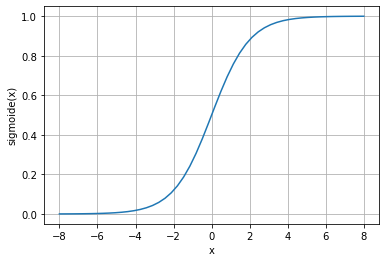

In [3]:
def sigmoide(x):
    return 1.0 / (1 + np.exp(-x))

plt.plot(eje_x, sigmoide(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('sigmoide(x)')
plt.show()

### Tangente hiperbólica

Text(0, 0.5, 'tanh(x)')

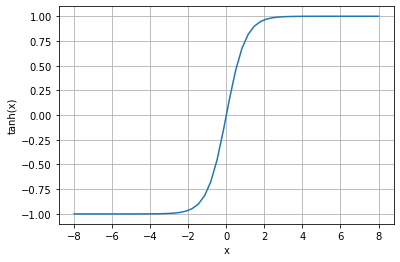

In [4]:
plt.plot(eje_x, np.tanh(eje_x))
plt.grid()
plt.xlabel('x')
plt.ylabel('tanh(x)')

## El problema: Determinar si una imagen tiene o no tiene un gato, dado un conjunto de datos con etiquetas.

<table>
  <tr>
    <th>Cat</th>
    <td> <img src="images/cat1.jpg" width="150"></td>
    <td> <img src="images/cat2.png" width="150"></td>
   </tr> 
   <tr>
      <th>Non Cat</th>
      <td> <img src="images/no_cat1.jpeg" width="150"></td>
      <td> <img src="images/no_cat2.jpg" width="150"></td>
  </tr>
</table>


In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

## Normalización

útil para que no haya valores muy grandes de gradiente

In [6]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1) #paso a vector la imagen
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1)
X_train = X_train/255.
X_test = X_test/255.

Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

Observams algún caso

y = [1], it's a 'cat' picture.


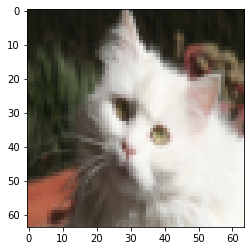

In [7]:
index = 102
# print (X_train[index].reshape(()))
plt.imshow(X_train_orig[index]) #original
print ("y = " + str(Y_train[index]) + ", it's a '" + classes[np.squeeze(Y_train[index])].decode("utf-8") +  "' picture.")

## Implementación en Sklearn

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba)

In [8]:
clf = neural_network.MLPClassifier(
    solver='sgd', #algoritmo de optimizción (descenso de gradiente estocastico)
    alpha=1e-4, 
    hidden_layer_sizes=(5), #unica capa oculta con 5 neuronas
    learning_rate='constant', #tasa de aprendizaje
    learning_rate_init=0.001, 
    batch_size=20,
    random_state=1,
    max_iter=1000, #cant. de iteraciones
    verbose=True)

In [9]:
clf.fit(X_train, Y_train.ravel()) # a medidia que itera baja la función de costo

Iteration 1, loss = 0.73637257
Iteration 2, loss = 0.72814070
Iteration 3, loss = 0.72206618
Iteration 4, loss = 0.71784621
Iteration 5, loss = 0.71409639
Iteration 6, loss = 0.70989772
Iteration 7, loss = 0.70659742
Iteration 8, loss = 0.70302878
Iteration 9, loss = 0.69942054
Iteration 10, loss = 0.69628679
Iteration 11, loss = 0.69333155
Iteration 12, loss = 0.69071555
Iteration 13, loss = 0.68790359
Iteration 14, loss = 0.68550357
Iteration 15, loss = 0.68305682
Iteration 16, loss = 0.68085484
Iteration 17, loss = 0.67877683
Iteration 18, loss = 0.67667372
Iteration 19, loss = 0.67460631
Iteration 20, loss = 0.67271247
Iteration 21, loss = 0.67108388
Iteration 22, loss = 0.66907659
Iteration 23, loss = 0.66728475
Iteration 24, loss = 0.66605890
Iteration 25, loss = 0.66441623
Iteration 26, loss = 0.66304044
Iteration 27, loss = 0.66154193
Iteration 28, loss = 0.66013801
Iteration 29, loss = 0.65879022
Iteration 30, loss = 0.65764886
Iteration 31, loss = 0.65623976
Iteration 32, los

Iteration 257, loss = 0.20955234
Iteration 258, loss = 0.20845110
Iteration 259, loss = 0.20834004
Iteration 260, loss = 0.20793360
Iteration 261, loss = 0.20784729
Iteration 262, loss = 0.20853156
Iteration 263, loss = 0.20737847
Iteration 264, loss = 0.20820052
Iteration 265, loss = 0.20762901
Iteration 266, loss = 0.20682159
Iteration 267, loss = 0.20611336
Iteration 268, loss = 0.20697526
Iteration 269, loss = 0.20612244
Iteration 270, loss = 0.20705427
Iteration 271, loss = 0.20698021
Iteration 272, loss = 0.20534009
Iteration 273, loss = 0.20463309
Iteration 274, loss = 0.20511210
Iteration 275, loss = 0.20508077
Iteration 276, loss = 0.20491087
Iteration 277, loss = 0.20467332
Iteration 278, loss = 0.20459954
Iteration 279, loss = 0.20407434
Iteration 280, loss = 0.20368207
Iteration 281, loss = 0.20551559
Iteration 282, loss = 0.20291512
Iteration 283, loss = 0.20286562
Iteration 284, loss = 0.20284875
Iteration 285, loss = 0.20573852
Iteration 286, loss = 0.20356997
Iteration 

MLPClassifier(batch_size=20, hidden_layer_sizes=5, max_iter=1000,
              random_state=1, solver='sgd', verbose=True)

Calculemos cuántos parámetros tiene el modelo:

In [10]:
total_params = 0
for case, name in zip(clf.coefs_, ('wi','bias')): #bias es el comeficiente beta8va en la rdenada al origen), sesgo o termino independiente
    print(name, '=', np.size(case))
    total_params += np.size(case)

for case, name in zip(clf.intercepts_, ('wi','bias')):
    print(name, '=', np.size(case))
    total_params += np.size(case)

print('total params = ', total_params)

wi = 61440
bias = 5
wi = 5
bias = 1
total params =  61451


Veamos algunas predicciones de probabilidad:

In [11]:
np.round(np.exp(clf.predict_log_proba(X_train)),1)

array([[0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0.9,

Podemos calcular la Accuracy del modelo en el conjunto de datos de entrenamiento:

In [12]:
predictions = clf.predict(X_train)
print (f'Accuracy: {accuracy_score(Y_train, predictions)*100:.2f}')

Accuracy: 94.74


Y ver cuánto da en el conjunto de datos de prueba

In [13]:
predictions = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(Y_test, predictions)*100:.2f}')

print('i, match, case (1=cat, 0=nocat)')
for i, match in enumerate(predictions == Y_test.ravel()):
    if i<15:
        print(i,match, Y_test[i])


Accuracy: 68.00
i, match, case (1=cat, 0=nocat)
0 True [1]
1 True [1]
2 True [1]
3 True [1]
4 True [1]
5 False [0]
6 True [1]
7 True [1]
8 True [1]
9 True [1]
10 False [1]
11 True [1]
12 True [1]
13 False [0]
14 True [0]


Veamos algunas predicciones:

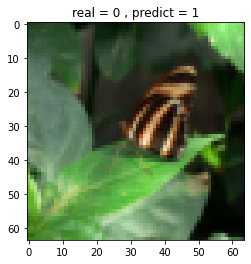

In [17]:
idx = 5
num_px = X_train_orig.shape[1]
plt.imshow(X_test[idx].reshape((num_px, num_px, 3)))
plt.title('real = '+str(Y_test[idx].item())+f' , predict = {predictions[idx]}')
plt.show()


Podemos ver cuál es la función de activación de salida

In [15]:
clf.out_activation_

'logistic'

# Keras

[Documentación](https://keras.io/api/models/model_training_apis/)

Implementemos el mismo clasificador pero construyendo el perceptrón múltiple con Keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.regularizers import L2
from keras.utils import set_random_seed

set_random_seed(2)

ImportError: cannot import name 'get_config' from 'tensorflow.python.eager.context' (C:\Anaconda3\lib\site-packages\tensorflow\python\eager\context.py)

[Dense layer](https://keras.io/api/layers/core_layers/dense/):

$y = activation(kernel \cdot X+bias)$


Definimos el modelo

In [ ]:
model = Sequential([
    Dense(5, input_shape=(X_train.shape[1],), activation="relu", kernel_regularizer=L2(1e-4)),
    Dense(1, activation="sigmoid", kernel_regularizer=L2(1e-4))
])

Definimos qué optimizador vamos a utilizar, qué función de costo vamos a optimizar y qué métricas almacenar:

In [ ]:
opt = SGD(learning_rate=0.001)
model.compile(
    optimizer=opt,
    loss="binary_crossentropy",
    metrics="acc"
)
model.summary()

Ajustamos el modelo:

In [ ]:
model.fit(X_train, Y_train.ravel(), batch_size=20, epochs=500, validation_data=(X_test, Y_test), workers=2)

In [ ]:
plt.subplot(1,3,1)
plt.plot(model.history.history['loss'])
plt.title('loss')
plt.subplot(1,3,2)
plt.plot(model.history.history['acc'])
plt.title('acc')
plt.subplot(1,3,3)
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret/n
plt.plot(model.history.history['val_acc'])
plt.plot(moving_average(model.history.history['val_acc'],n=20))
plt.title('val_acc')
plt.show()

Podemos acceder a los pesos y almacenarlos si es que nos interesa guardar el modelo:

In [ ]:
wnew = model.weights
wnew

Existe el método evaluate para evaluar el modelo en el conjunto de datos de prueba:

In [ ]:
model.evaluate(x=X_test, y=Y_test, batch_size=100,)

El método predict permite predecir utilizando el modelo entrenado

In [ ]:
prediction = model.predict(x=X_test)
prediction[prediction>0.5] = 1
prediction[prediction<=0.5] = 0
prediction = prediction.squeeze()

index = 2
num_px = X_train_orig[index].shape[0]

plt.imshow(X_test[index,:].reshape((num_px, num_px, 3)))
print ("y = " + str(Y_test[index,0]) + ", you predicted that it is a \"" + classes[int(prediction[index])].decode("utf-8") +  "\" picture.")

Veamos algunas métricas de bondad de modelo:

In [ ]:
print(classification_report(Y_test, prediction))
ConfusionMatrixDisplay.from_predictions(Y_test, prediction,labels=(1,0))

# Representación gráfica de la red

In [ ]:
import visualkeras #hay que instalarlo
visualkeras.layered_view(model, legend=True)

In [ ]:
from keras_visualizer import visualizer #hay que instalarlo
visualizer(model, filename='images/keras_visualizer', format='png', view=False)

In [ ]:
from keras.utils import plot_model

plot_model(model, 
to_file='images/model.png',
show_shapes=True,
show_layer_names=False,
show_layer_activations=True)

# Ejemplo de uso más interesante

Ahora vamos a centrarnos en entrenar un perceptrón multicapa en un conjunto de datos más grande, como lo es el conjunto mnist de dígitos escritos a mano

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist

In [ ]:
# cargamos el conjunto de datos
(x_train, y_train),(x_test, y_test) = mnist.load_data()
unique, counts = np.unique(y_train, return_counts=True)
print("Etiquetas de entrenamiento: ", dict(zip(unique, counts)))
unique, counts = np.unique(y_test, return_counts=True)
print("Etiquetas de prueba: ", dict(zip(unique, counts)))


Muestreamos algunos dígitos:

In [ ]:
cantidad = 25
indexes = np.random.randint(0, x_train.shape[0], size=cantidad)
images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()

### One-Hot-Encoding

Primero transformamos las etiquetas (números del 0 al 9) a vectores de dimensión 10 en los cuáles sólo será no nulo el elemento cuyo índice de órden sea igual a la etiqueta. Esto es:

$0 = (1,0,0,0,0,0,0,0,0,0)$

$1 = (0,1,0,0,0,0,0,0,0,0)$

$2 = (0,0,1,0,0,0,0,0,0,0)$

$3 = (0,0,0,1,0,0,0,0,0,0)$

$4 = (0,0,0,0,1,0,0,0,0,0)$

$5 = (0,0,0,0,0,1,0,0,0,0)$

$6 = (0,0,0,0,0,0,1,0,0,0)$

$7 = (0,0,0,0,0,0,0,1,0,0)$

$8 = (0,0,0,0,0,0,0,0,1,0)$

$9 = (0,0,0,0,0,0,0,0,0,1)$


In [ ]:
from keras.utils import to_categorical, plot_model

In [ ]:
num_labels = len(np.unique(y_train))
print(num_labels)

In [ ]:
y_train

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train

### Preprocesamiento de los datos

- Suele ser conveniente normalizar los datos para evitar valores muy grandes de gradiente que puedan dificultar el proceso de aprendizaje. Los valores de los pixeles están en escala de grises de 0 a 255.

- El perceptrón múltiple debe aceptar un tensor 1-dimensional, así que hay que transformar los datos de entrada.

In [ ]:
# Tamaño de la imagen, que se asume cuadrada
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

In [ ]:
# transformación y normalización
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [ ]:
x_train.shape

### Parámetros de la red

In [ ]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

### Diseño de la arquitectura de la red

- Proponemos un diseño con 3 capas ocultas. 

- Las primeras dos capas serán idénticas y completamente conectadas. Tendrán funciones de activación ReLU y implementaremos Dropout.

- Se eligirán 256 neuronas por capa oculta. Este número podría testearse a prueba y error. Se suelen usar múltiplos de 2 como 128, 512, 1024. En un análisis previo se vio que 256 funciona mejor.

In [ ]:
modelo_mnist = Sequential()
modelo_mnist.add(Dense(hidden_units, input_dim=input_size, kernel_regularizer=L2(0.001)))
modelo_mnist.add(Activation('relu'))
modelo_mnist.add(Dropout(dropout))
modelo_mnist.add(Dense(hidden_units, kernel_regularizer=L2(0.001)))
modelo_mnist.add(Activation('relu'))
modelo_mnist.add(Dropout(dropout))
modelo_mnist.add(Dense(num_labels))
modelo_mnist.add(Activation('softmax'))
modelo_mnist.summary()

Esto sale de:

- Entrada a primera capa: $784 \times 256 + 256 = 200960$
- primera a Segunda capa: $256 \times 256 + 256 = 65792$
- segunda capa a salida: $10 \times 256 + 10 = 2570$
- Total : $200960 + 65972 + 2570 = 269322$

In [ ]:
plot_model(modelo_mnist, 
to_file='images/modelo_mnist.png',
show_shapes=True,
show_layer_names=False,
show_layer_activations=True)

In [ ]:
opt = Adam(learning_rate=0.001)
modelo_mnist.compile(loss='categorical_crossentropy', 
              optimizer=opt,
              metrics="acc")

In [ ]:
modelo_mnist.fit(x_train, y_train, epochs=10,
 batch_size=batch_size,validation_data=(x_test, y_test), workers=2)

In [ ]:
plt.subplot(1,2,1)
plt.plot(modelo_mnist.history.history['loss'], label='train')
plt.plot(modelo_mnist.history.history['val_loss'],label='test')
plt.legend()
plt.title('loss')
plt.subplot(1,2,2)
plt.plot(modelo_mnist.history.history['acc'],label='train')
plt.plot(modelo_mnist.history.history['val_acc'],label='test')
plt.ylim(0.5,1)
plt.title('acc')
plt.legend()
plt.show()

https://keras.io/getting_started/faq/#why-is-the-training-loss-much-higher-than-the-testing-loss

### Sanity check
Overfit a tiny subset of data. Before training on the full dataset try to train on a tiny portion (e.g. 20 examples) of your data and make sure you can achieve zero cost. For this experiment it’s also best to set regularization to zero, otherwise this can prevent you from getting zero cost. Unless you pass this sanity check with a small dataset it is not worth proceeding to the full dataset. Note that it may happen that you can overfit very small dataset but still have an incorrect implementation. For instance, if your datapoints’ features are random due to some bug, then it will be possible to overfit your small training set but you will never notice any generalization when you fold it your full dataset.

[referencia](https://cs231n.github.io/neural-networks-3/#sanitycheck)

Observamos que cada predicción es un array con 10 números, cuyo máximo valor corresponde a la clase predicha.

In [ ]:
prediction = modelo_mnist.predict(x=x_test)
prediction

Podemos obtener la etiqueta predicha utilizando la función np.argmax

In [ ]:
def get_label(x):
    return np.argmax(x)

get_label(prediction[0])

Acá tienen unas funciones que pueden servir para observar los resultados predichos:

In [ ]:
def plot_image(i, predictions_array, true_label, img, num_px):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i].reshape((num_px, num_px, 1))
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  plt.title(f'True: {true_label}, Predicted: {predicted_label}')
  

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(np.linspace(0,1,11).round(2))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
num_px = 28
plot_image(i, prediction[i], y_test, x_test, num_px)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  y_test)
plt.title('Probabilidad de cada clase')
plt.show()

## Ejemplos extras

- El ejemplo de esta notebook fue basado en este [enlace](https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras/notebook).

- Va otro [ejemplo](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419) de clasificación de imágenes de ropa. 

- Dejo un [ejemplo](https://www.tensorflow.org/tutorials/keras/regression?hl=es-419) de regresión con un perceptrón múltiple en keras para que no crean que es todo sobre imágenes.
